<a href="https://colab.research.google.com/github/yperdana/predicting-used-car-price/blob/master/Final_Project_Split_data_and_validation_used_car_prices_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Github and members information:**

github link: https://github.com/yperdana/predicting-used-car-price

Team Members :
1. Yohanes Perdana Putra - yperdana.putra@gmail.com - yperdana
2. Eko Junirianto - eko.ilkom@gmail.com - ekoilkom
3. Yogic Wahyu Rahmadianto - yogicrhama@gmail.com-yogocik

Worksheet :
1. Yohanes Perdana Putra: (1) Find data in kaggle. (2) Early prepocessing/filtering and Spliting data. (3) Creating Model. (4) Spliting Data process. (4) Do Validation. (5) do Test the Test Dataset. (6) do documentation in github and colab.
2. Eko Junirianto
3. Yogic Wahyu Rahmadianto


**Project Information:**

This project try to predict used car price based on powerPS. We use simple linear regression as our first project to predict numerical.

On the previous colab, we have done experiment creating a model that predict price of used car based on PowerPS. link: https://colab.research.google.com/github/yperdana/predicting-used-car-price-based-on-kilometer/blob/master/Predicting_Used_Car_Price_Based_on_PowerPS.ipynb


**Dataset**

Datasource: https://www.kaggle.com/orgesleka/used-cars-database/data

We had filtered the data such as:
1. Only SUV type
2. Only Mercedes-Bens
3. Last 5 years 

The reason was, github only could save < 20mb data. We choose SUV because this type is the largest number of data. We decide to filter by brand because we see large difference price on different brand, this will hard to train the model. We took last 5 year, we think the price will not much change.

**Framing & Hypothesis**

Problem: Power of the car can take the effect of the car price. Kaggle provide used car prices data. There are mathematical model can predict the numerical data.

Hypotehsis:
1. PowerPS have strong corelation with car price. The result is true.
2. Using PowerPS and Car Price in feature and label, we can generate model to predict price based on powerPS. The result is true.

**Preparation/Methodology:**

1. Learning the Machine Learning Crash Course.
3. Select Algorithm (Simple Linear Regression)
2. Find Data (Used car price)
4. Feature selection, Data Preprocessing/Filter Data
5. Implementation: (1) Import libraries (2) Import Data (3) Generate Model (4) Hyperparameter Tunning, Validation process, Test dataset.
6. Reporting

**Reference**

We only use reference from Machine Learning Crash Course.


In [0]:
# Importing Libraries

#Run on TensorFlow 2.x
%tensorflow_version 2.x

#Import modules
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

pd.options.display.max_rows = 10
pd.options.display.float_format = "{:.1f}".format

In [0]:
#import training dataset and test dataset
train_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vSSSuRsQI7kEbHxM9rGNIADIhyLAnT9vUch44nZlCFYsmQAiafrXbnnPrliFeoA-ZkYz8_dRQtKQ9Ha/pub?output=csv")
test_df = pd.read_csv("https://docs.google.com/spreadsheets/d/e/2PACX-1vR2g80pUxiZnfWzq4yMJotfVFvZZQ7WHSlfpOg2hgjSCEqZjeb__32qE6SYItHFaZbyjtIgFALnQBb0/pub?output=csv")

In [70]:
#Describe head of training dataset
train_df.head()



,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,4/5/16 12:45,Mercedes_Benz_GLE_Coupe_350_BlueTEC_4MATIC_9G_...,privat,Angebot,73000,test,suv,2015,automatik,170,g_klasse,20000,10,diesel,mercedes_benz,nein,4/5/16 00:00,0,12683,4/5/16 12:45
1,3/21/16 9:36,Mercedes_Benz_GLE_350_d_4Matic_9G_TRONIC_AMG_Line,privat,Angebot,69999,control,suv,2016,automatik,211,andere,5000,1,diesel,mercedes_benz,nein,3/21/16 0:00,0,10715,3/31/16 11:16
2,4/4/16 09:50,Mercedes_Benz_ML_350_Bluetec_4_Matic,privat,Angebot,65000,control,suv,2014,automatik,156,m_klasse,40000,1,diesel,mercedes_benz,nein,4/4/16 00:00,0,81925,4/6/16 11:17
3,3/15/16 23:54,Mercedes_ML_350_BlueTEC_4Matic_Leasinguebernahme,privat,Angebot,59000,control,suv,2014,automatik,258,m_klasse,20000,4,diesel,mercedes_benz,nein,3/15/16 0:00,0,53773,4/6/16 00:46
4,3/31/16 21:54,Mercedes_Benz_ML_350_BlueTEC_4MATIC_7G_TRONIC,privat,Angebot,58900,test,suv,2014,automatik,170,m_klasse,30000,4,diesel,mercedes_benz,nein,3/31/16 0:00,0,54329,4/6/16 17:45


In [71]:
#Describe statistics of training dataset
train_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,51.0,51.0,51.0,51.0,51.0,51.0,51.0
mean,45182.9,2014.5,187.0,22843.1,5.5,0.0,56094.5
std,15454.9,0.7,42.7,15370.6,2.9,0.0,24110.8
min,24301.0,2014.0,109.0,5000.0,1.0,0.0,10715.0
25%,33749.5,2014.0,156.0,10000.0,3.0,0.0,37441.5
50%,41900.0,2014.0,170.0,20000.0,5.0,0.0,56566.0
75%,56750.0,2015.0,211.0,30000.0,7.0,0.0,75763.0
max,82800.0,2016.0,258.0,70000.0,12.0,0.0,94239.0


In [72]:
#Describe head of test dataset
test_df.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,4/4/16 13:47,Mercedes_Benz_GLA_200_AMG,privat,Angebot,18300,control,suv,2014,manuell,204,andere,20000,4,benzin,mercedes_benz,ja,4/4/16 00:00,0,44627,4/6/16 15:16
1,4/4/16 22:58,Mercedes_Benz_GLK_200_CDI_AMG_NAVI_ALCANTARA_X...,privat,Angebot,36499,test,suv,2015,automatik,170,glk,30000,4,diesel,mercedes_benz,nein,4/4/16 00:00,0,36100,4/4/16 23:43
2,3/20/16 0:36,Mercedes_Benz_GLK_200_CDI__BlueEFFICIENCY_,privat,Angebot,27400,control,suv,2014,manuell,156,glk,30000,10,diesel,mercedes_benz,nein,3/20/16 0:00,0,73207,4/6/16 03:45
3,3/14/16 20:44,Mercedes_Benz_GLA_200_AMG_Panorama_Navi_Kam_Xe...,privat,Angebot,33400,control,suv,2015,manuell,170,andere,5000,9,diesel,mercedes_benz,nein,3/14/16 0:00,0,53639,4/6/16 08:15
4,3/28/16 12:55,geplegter_Mercedes_Benz_GLA_200_CDI_7G_DCT_Spo...,privat,Angebot,31750,test,suv,2014,automatik,156,andere,20000,7,diesel,mercedes_benz,nein,3/28/16 0:00,0,74360,4/6/16 16:15


In [74]:
#Describe statistics of test dataset
test_df.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,30557.1,2014.8,180.0,15000.0,6.5,0.0,63399.7
std,4963.4,0.8,33.1,10274.0,2.9,0.0,15633.7
min,18300.0,2014.0,156.0,5000.0,3.0,0.0,36100.0
25%,29937.5,2014.0,156.0,5000.0,4.0,0.0,52694.0
50%,31750.0,2015.0,170.0,15000.0,7.0,0.0,70446.0
75%,33105.5,2015.0,195.5,20000.0,8.5,0.0,74164.8
max,36499.0,2016.0,258.0,30000.0,11.0,0.0,84061.0


In [75]:
# Define the functions that build and train a model
def build_model(my_learning_rate):
  """Create and compile a simple linear regression model."""
  # Most simple tf.keras models are sequential.
  model = tf.keras.models.Sequential()

  # Add one linear layer to the model to yield a simple linear regressor.
  model.add(tf.keras.layers.Dense(units=1, input_shape=(1,)))

  # Compile the model topography into code that TensorFlow can efficiently
  # execute. Configure training to minimize the model's mean squared error. 
  model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=my_learning_rate),
                loss="mean_squared_error",
                metrics=[tf.keras.metrics.RootMeanSquaredError()])

  return model               

def train_model(model, df, feature, label, my_epochs, 
                my_batch_size=None, my_validation_split=0.1):
  """Feed a dataset into the model in order to train it."""

  history = model.fit(x=df[feature],
                      y=df[label],
                      batch_size=my_batch_size,
                      epochs=my_epochs,
                      validation_split=my_validation_split)

  # Gather the model's trained weight and bias.
  trained_weight = model.get_weights()[0]
  trained_bias = model.get_weights()[1]

  # The list of epochs is stored separately from the 
  # rest of history.
  epochs = history.epoch
  
  # Isolate the root mean squared error for each epoch.
  hist = pd.DataFrame(history.history)
  rmse = hist["root_mean_squared_error"]

  return trained_weight, epochs, rmse, history.history   

print("Defined the build_model and train_model functions.")

Defined the build_model and train_model functions.


In [76]:
#Define the plotting function

def plot_the_model(trained_weight, trained_bias, feature, label, largest_value):
  """Plot the trained model against 200 random training examples."""

  # Label the axes.
  plt.xlabel(feature)
  plt.ylabel(label)

  # Create a scatter plot from 200 random points of the dataset.
  random_examples = train_df.sample(n=50)
  plt.scatter(random_examples[feature], random_examples[label])

  # Create a red line representing the model. The red line starts
  # at coordinates (x0, y0) and ends at coordinates (x1, y1).
  x0 = 0
  y0 = trained_bias
  x1 = largest_value
  y1 = trained_bias + (trained_weight * x1)
  plt.plot([x0, x1], [y0, y1], c='r')

  # Render the scatter plot and the red line.
  plt.show()

def plot_the_loss_curve_training(epochs, rmse):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error only Training")

  plt.plot(epochs, rmse, label="Loss")
  plt.legend()
  plt.ylim([rmse.min()*0.97, rmse.max()])
  plt.show()  

def plot_the_loss_curve_validation(epochs, mae_training, mae_validation):
  """Plot a curve of loss vs. epoch."""

  plt.figure()
  plt.xlabel("Epoch")
  plt.ylabel("Root Mean Squared Error Training and Validation")

  plt.plot(epochs[1:], mae_training[1:], label="Training Loss")
  plt.plot(epochs[1:], mae_validation[1:], label="Validation Loss")
  plt.legend()
  
  # We're not going to plot the first epoch, since the loss on the first epoch
  # is often substantially greater than the loss for other epochs.
  merged_mae_lists = mae_training[1:] + mae_validation[1:]
  highest_loss = max(merged_mae_lists)
  lowest_loss = min(merged_mae_lists)
  delta = highest_loss - lowest_loss
  print(delta)

  top_of_y_axis = highest_loss + (delta * 0.05)
  bottom_of_y_axis = lowest_loss - (delta * 0.05)
   
  plt.ylim([bottom_of_y_axis, top_of_y_axis])
  plt.show()  

print("Defined the plot_the_loss_curve function.")

Defined the plot_the_loss_curve function.


Epoch 1/70
1/1 [==============================] - 0s 79ms/step - loss: 554218112.0000 - root_mean_squared_error: 23541.8379 - val_loss: 128610488.0000 - val_root_mean_squared_error: 11340.6562
Epoch 2/70
1/1 [==============================] - 0s 34ms/step - loss: 479571808.0000 - root_mean_squared_error: 21899.1289 - val_loss: 115326752.0000 - val_root_mean_squared_error: 10739.0293
Epoch 3/70
1/1 [==============================] - 0s 32ms/step - loss: 430522048.0000 - root_mean_squared_error: 20749.0254 - val_loss: 104992928.0000 - val_root_mean_squared_error: 10246.6055
Epoch 4/70
1/1 [==============================] - 0s 30ms/step - loss: 392344288.0000 - root_mean_squared_error: 19807.6816 - val_loss: 96380344.0000 - val_root_mean_squared_error: 9817.3496
Epoch 5/70
1/1 [==============================] - 0s 30ms/step - loss: 360509600.0000 - root_mean_squared_error: 18987.0898 - val_loss: 88927664.0000 - val_root_mean_squared_error: 9430.1465
Epoch 6/70
1/1 [=======================

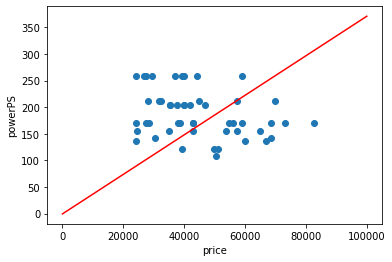

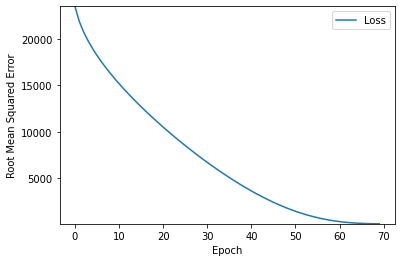

21854.58397293091


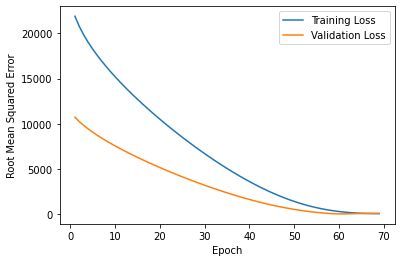

In [0]:
# Testing Corelation between households and total_rooms.

# Selecting label and feature
my_feature = "price"
my_label= "powerPS" 

# Assign values to these three hyperparameters.
learning_rate = 0.01
epochs = 70
batch_size =  60

# Don't change anything below this line.
my_model = None
my_model = build_model(learning_rate)

#generate model and gain some data from the model
weight, epochs, rmse, history = train_model(my_model, train_df, my_feature, 
                                    my_label, epochs, batch_size, 
                                    validation_split)

#show the result of the model
plot_the_model(weight, bias, my_feature, my_label,100000)

#show the result loss of training
plot_the_loss_curve_training(epochs, rmse)

#comparing the result between loss of training and validation
plot_the_loss_curve_validation(epochs, history["root_mean_squared_error"], 
                    history["val_root_mean_squared_error"])


In [77]:
#test the test dataset
x_test = test_df[my_feature]
y_test = test_df[my_label]

results = my_model.evaluate(x_test, y_test, batch_size=batch_size)

1/1 [==============================] - 0s 2ms/step - loss: 5862.1353 - root_mean_squared_error: 76.5646


**Result:**
1. From the 1st Graph above, the line generated by training dataset has been fit in the middle of data.
2. 2nd Graph shows the loss is much from 700.000 reduce and the curve almost near the botom 70 or near zero.
3. 3rd Graph shows training and validation generate nearly same loss result in the end.
4. Training MSE result was 73.x and testing MSE result was 76.x, which close enough.

**Conclusion:**
1. We think the training model has created a good result by comparing the graph and MSE value. 
2. PowerPS has strong corelation with Price.
3. this model can predict price of mercedes-bens SUV car by powerPS.